1 - Filtrar dataset.
* No tienen transcripciones
* Música
* Baja densidad de palabras
* Tags de youtube no deseadas 

In [1]:
import os
import json
import glob
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
base_path='/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/'
with open (base_path+'experiments/audio_lists/all_audio_complete_set.txt') as file:
    complete_list=file.read().splitlines()    

## No transcriptions list

In [8]:
transcriptions_path=base_path+'data/transcriptions'

a=0
with open('../experiments/audio_lists/blacklist_no_transcriptions.txt', 'w') as blacklist:    
    for i in complete_list: 
        filepath=transcriptions_path+'/'+i+'.txt'
        eval=os.path.getsize(filepath)
        if eval==0:
            blacklist.write(i+'\n')

## Forced Aligner errors list

In [66]:
json_path='../data/JSON'

with open ('../experiments/audio_lists/blacklist_blank_json.txt', 'w') as blacklist_json:
    for i in complete_list: 
        filepath=json_path+'/'+i+'.JSON'
        with open (filepath, 'r') as jsonfile:
            js=json.load(jsonfile)
            if not 'words' in js.keys():
                blacklist_json.write(i+'\n') 

## Audios with music list

In [45]:
with open (base_path+'experiments/audio_lists/all_audio_complete_set.txt') as file:
    complete_set=file.read().splitlines()
with open (base_path+'experiments/audio_lists/all_audio_no_music_threshold_0.2.txt') as file:
    no_music=file.read().splitlines()

with open (base_path+'experiments/audio_lists/music_0.2.txt','w') as file:
    
    [ file.write(i+'\n') for i in complete_set if i not in no_music ]

## Speech segments without music

Resto a la lista completa de los que tienen solo speech (9797), los que tienen música con umbral <0.2

In [50]:
with open (base_path+'experiments/audio_lists/speech.txt') as file:
    speech_list=file.read().splitlines()
with open (base_path+'experiments/audio_lists/all_audio_no_music_threshold_0.2.txt') as file:
    no_music=file.read().splitlines()

with open (base_path+'experiments/audio_lists/speech_no_music.txt','w') as file:
    
    [ file.write(i+'\n') for i in speech_list if i in no_music ]

## Speech rate

* Lo hago sobre los audios procesados (no_unvoiced) porque son menos que los totales. El forced aligner no llega a detectar las palabras.
* Busco distintos umbrales de ratio=speech/total. Particularmente busco los mayores a 0.5, 0.6, 0.7, 0.8. 

In [18]:
base='/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/'
no_unvoiced_list=glob.glob(base+'data/audios_no_unvoiced/*/*.wav')

Generé el DF corriendo el script "speech_ratio.py"

In [5]:
audios=glob.glob('/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/data/JSON/*/*.JSON')
df=pd.read_csv('/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/experiments/audio_lists/df_speech_rate.csv', index_col=[0])

In [6]:
df

,name,part,speech_ratio
0,mDRMCwSD3Ms.001.wav,Val,0.922849
1,nUazOUcW_AM.002.wav,Val,0.710487
2,8AnIttmflwI.000.wav,Val,0.741827
3,XB81sertsYU.004.wav,Val,0.632037
4,alucqviYJFE.005.wav,Val,0.857515
...,...,...,...
9792,SkNO4x-LSgE.001.wav,Test,0.776459
9793,QdafN9Y_j-Y.003.wav,Test,0.848353
9794,JJs_HTelie4.000.wav,Test,0.835945
9795,cWvZnl5XjwI.002.wav,Test,0.769295


Filtro el dataframe

In [25]:
df_50=df[df['speech_ratio']>=0.5]
df_60=df[df['speech_ratio']>=0.6]
df_70=df[df['speech_ratio']>=0.7]
df_80=df[df['speech_ratio']>=0.8]
df_90=df[df['speech_ratio']>=0.9]

In [26]:
list_50=df_50.name.values
list_60=df_60.name.values
list_70=df_70.name.values
list_80=df_80.name.values
list_90=df_90.name.values

In [27]:
L_50=len(list_50)
L_60=len(list_60)
L_70=len(list_70)
L_80=len(list_80)
L_90=len(list_90)

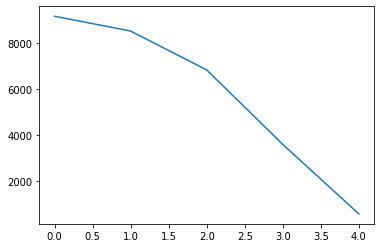

In [28]:
plt.plot([L_50,L_60,L_70, L_80, L_90])

In [ ]:
data={'Speech rate: 50%': [L_50, 
    df_50[df_50['part']=='Train'].shape[0],
    df_50[df_50['part']=='Test'].shape[0], 
    df_50[df_50['part']=='Val'].shape[0]],
    'Speech rate: 60%': [L_60, 
    df_60[df_60['part']=='Train'].shape[0],
    df_60[df_60['part']=='Test'].shape[0], 
    df_60[df_60['part']=='Val'].shape[0]],
    'Speech rate: 70%': [L_70, 
    df_70[df_70['part']=='Train'].shape[0],
    df_70[df_70['part']=='Test'].shape[0], 
    df_70[df_70['part']=='Val'].shape[0]],
    'Speech rate: 80%': [L_80, 
    df_80[df_80['part']=='Train'].shape[0],
    df_80[df_80['part']=='Test'].shape[0], 
    df_80[df_80['part']=='Val'].shape[0]],
    'Speech rate: 90%': [L_90, 
    df_90[df_90['part']=='Train'].shape[0],
    df_90[df_90['part']=='Test'].shape[0], 
    df_90[df_90['part']=='Val'].shape[0]]}

In [35]:
speech_rate_data=pd.DataFrame.from_dict(data, orient='index', columns=['Dataset size','Train size','Test size', 'Val size'])

In [36]:
speech_rate_data.to_csv('/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/experiments/audio_lists/speech_rate_data.csv')

In [37]:
speech_rate_data

,Dataset size,Train size,Test size,Val size
Speech rate: 50%,9171,5472,1843,1856
Speech rate: 60%,8526,5102,1700,1724
Speech rate: 70%,6833,4112,1338,1383
Speech rate: 80%,3590,2155,704,731
Speech rate: 90%,565,359,107,99


## Speech ratio Silero

In [24]:
df=pd.read_csv('/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/experiments/audio_lists/speech_ratio_silero/df_speech_ratio_silero.csv', index_col=[0])

In [25]:
df

,name,part,speech_ratio
0,mDRMCwSD3Ms.001.wav,Val,0.963926
1,nUazOUcW_AM.002.wav,Val,0.985100
2,8AnIttmflwI.000.wav,Val,0.938439
3,XB81sertsYU.004.wav,Val,0.980787
4,alucqviYJFE.005.wav,Val,0.864724
...,...,...,...
9993,SkNO4x-LSgE.001.wav,Test,0.949026
9994,QdafN9Y_j-Y.003.wav,Test,0.917266
9995,JJs_HTelie4.000.wav,Test,0.924324
9996,cWvZnl5XjwI.002.wav,Test,0.960005


In [26]:
df_50=df[df['speech_ratio']>=0.5]
df_60=df[df['speech_ratio']>=0.6]
df_70=df[df['speech_ratio']>=0.7]
df_80=df[df['speech_ratio']>=0.8]
df_90=df[df['speech_ratio']>=0.9]

list_50=df_50.name.values
list_60=df_60.name.values
list_70=df_70.name.values
list_80=df_80.name.values
list_90=df_90.name.values

L_50=len(list_50)
L_60=len(list_60)
L_70=len(list_70)
L_80=len(list_80)
L_90=len(list_90)

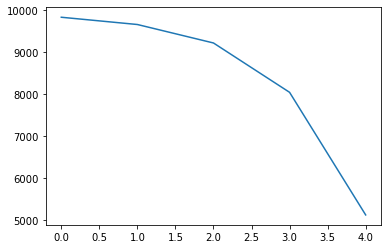

In [27]:
plt.plot([L_50,L_60,L_70, L_80, L_90])

In [28]:
data={'Speech rate: 50%': [L_50, 
    df_50[df_50['part']=='Train'].shape[0],
    df_50[df_50['part']=='Test'].shape[0], 
    df_50[df_50['part']=='Val'].shape[0]],
    'Speech rate: 60%': [L_60, 
    df_60[df_60['part']=='Train'].shape[0],
    df_60[df_60['part']=='Test'].shape[0], 
    df_60[df_60['part']=='Val'].shape[0]],
    'Speech rate: 70%': [L_70, 
    df_70[df_70['part']=='Train'].shape[0],
    df_70[df_70['part']=='Test'].shape[0], 
    df_70[df_70['part']=='Val'].shape[0]],
    'Speech rate: 80%': [L_80, 
    df_80[df_80['part']=='Train'].shape[0],
    df_80[df_80['part']=='Test'].shape[0], 
    df_80[df_80['part']=='Val'].shape[0]],
    'Speech rate: 90%': [L_90, 
    df_90[df_90['part']=='Train'].shape[0],
    df_90[df_90['part']=='Test'].shape[0], 
    df_90[df_90['part']=='Val'].shape[0]]}

In [29]:
speech_rate_data=pd.DataFrame.from_dict(data, orient='index', columns=['Dataset size','Train size','Test size', 'Val size'])

In [30]:
speech_rate_data.to_csv('/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/experiments/audio_lists/speech_ratio_silero/silero_speech_rate_data.csv')

In [31]:
speech_rate_data

,Dataset size,Train size,Test size,Val size
Speech rate: 50%,9833,5904,1964,1965
Speech rate: 60%,9660,5797,1933,1930
Speech rate: 70%,9220,5522,1837,1861
Speech rate: 80%,8045,4817,1599,1629
Speech rate: 90%,5125,3066,1028,1031


In [32]:
with open ('/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/experiments/audio_lists/silero_speech_rate>0.5.txt','w') as file:    
    for i in range(df_50.shape[0]):
        filename=df_50.iloc[i]['part']+'/'+df.iloc[i]['name']
        file.write(filename+'\n')

In [33]:
with open ('/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/experiments/audio_lists/silero_speech_rate>0.6.txt','w') as file:    
    for i in range(df_60.shape[0]):
        filename=df_60.iloc[i]['part']+'/'+df.iloc[i]['name']
        file.write(filename+'\n')

In [34]:
with open ('/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/experiments/audio_lists/silero_speech_rate>0.7.txt','w') as file:    
    for i in range(df_70.shape[0]):
        filename=df_70.iloc[i]['part']+'/'+df.iloc[i]['name']
        file.write(filename+'\n')

In [35]:
with open ('/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/experiments/audio_lists/silero_speech_rate>0.8.txt','w') as file:    
    for i in range(df_80.shape[0]):
        filename=df_50.iloc[i]['part']+'/'+df.iloc[i]['name']
        file.write(filename+'\n')

In [36]:
with open ('/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/experiments/audio_lists/silero_speech_rate>0.9.txt','w') as file:    
    for i in range(df_90.shape[0]):
        filename=df_90.iloc[i]['part']+'/'+df.iloc[i]['name']
        file.write(filename+'\n')

## Speech ratio + music yamnet

In [37]:
silero_sr_50_path='/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/experiments/audio_lists/silero_speech_rate>0.5.txt'
silero_sr_60_path='/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/experiments/audio_lists/silero_speech_rate>0.6.txt'
silero_sr_70_path='/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/experiments/audio_lists/silero_speech_rate>0.7.txt'
silero_sr_80_path='/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/experiments/audio_lists/silero_speech_rate>0.8.txt'
silero_sr_90_path='/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/experiments/audio_lists/silero_speech_rate>0.9.txt'
yamnet_no_music_20_path='/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/experiments/audio_lists/yamnet_no_music_0.2.txt'

In [38]:
with open(silero_sr_50_path) as file:
    silero_50_list=file.read().splitlines()

with open(silero_sr_60_path) as file:
    silero_60_list=file.read().splitlines()

with open(silero_sr_70_path) as file:
    silero_70_list=file.read().splitlines()

with open(silero_sr_80_path) as file:
    silero_80_list=file.read().splitlines()

with open(silero_sr_90_path) as file:
    silero_90_list=file.read().splitlines()

with open(yamnet_no_music_20_path) as file:
    yamnet_no_music_20_list=file.read().splitlines()

In [39]:
with open('/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/experiments/audio_lists/yamnet_no_music_20+speech_rate_>0.5.txt','w') as file:
    for sample in yamnet_no_music_20_list:
        name=sample+'.wav'
        if name in silero_50_list:
            file.write(name+'\n')

In [40]:
with open('/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/experiments/audio_lists/yamnet_no_music_20+speech_rate_>0.6.txt','w') as file:
    for sample in yamnet_no_music_20_list:
        name=sample+'.wav'
        if name in silero_60_list:
            file.write(name+'\n')

In [41]:
with open('/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/experiments/audio_lists/yamnet_no_music_20+speech_rate_>0.7.txt','w') as file:
    for sample in yamnet_no_music_20_list:
        name=sample+'.wav'
        if name in silero_70_list:
            file.write(name+'\n')

In [42]:
with open('/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/experiments/audio_lists/yamnet_no_music_20+speech_rate_>0.8.txt','w') as file:
    for sample in yamnet_no_music_20_list:
        name=sample+'.wav'
        if name in silero_80_list:
            file.write(name+'\n')

In [43]:
with open('/home/german/Documentos/Trust/First_Impressions_Dataset/OCEAN_new_structure/experiments/audio_lists/yamnet_no_music_20+speech_rate_>0.9.txt','w') as file:
    for sample in yamnet_no_music_20_list:
        name=sample+'.wav'
        if name in silero_90_list:
            file.write(name+'\n')